In [ ]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Uniform

In uniform case, I know nothing about the distribution of the event assignments, so I need
enough bits to help me decide amoung 10 choices. That would be $\log_2(10) = 3.4$ bits.
Note that 4 bits allows representing 16 choices, and 3 bits 8. So hence the value.

In [ ]:
np.log(10)/np.log(2)

3.3219280948873626

In [ ]:
n = 10
probs = torch.full((n,), 1/n)
probs

tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000])

In [ ]:
torch.log(probs)

tensor([-2.3026, -2.3026, -2.3026, -2.3026, -2.3026, -2.3026, -2.3026, -2.3026,
        -2.3026, -2.3026])

In [ ]:
-torch.sum(probs*torch.log(probs))

tensor(2.3026)

Perplexity is 10, nice!

In [ ]:
torch.exp(-torch.sum(probs*torch.log(probs)))

tensor(10.0000)

Now let's try computing entropy in bits instead:

In [ ]:
-torch.sum(probs*torch.log(probs))/np.log(2)

tensor(3.3219)

As you can see, we have recovered $\log_2(10) = 3.4$

In [ ]:
np.log(2)

0.6931471805599453

## Some plots

In [ ]:
probs = torch.softmax(torch.randn(10), 0)

[Text(0.5, 1.0, 'P(X)')]

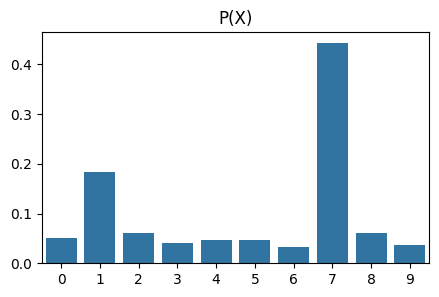

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5,3))
sns.barplot(probs, ax=ax).set(title="P(X)")

[Text(0.5, 1.0, '-log(P(X))')]

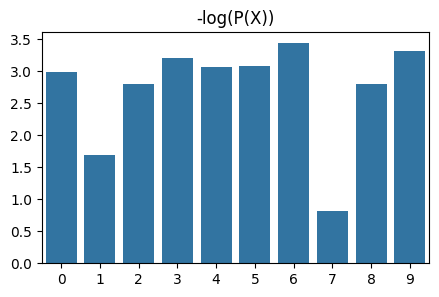

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5,3))
sns.barplot(-torch.log(probs), ax=ax).set(title="-log(P(X))")

[Text(0.5, 1.0, '-P(X)log(P(X))')]

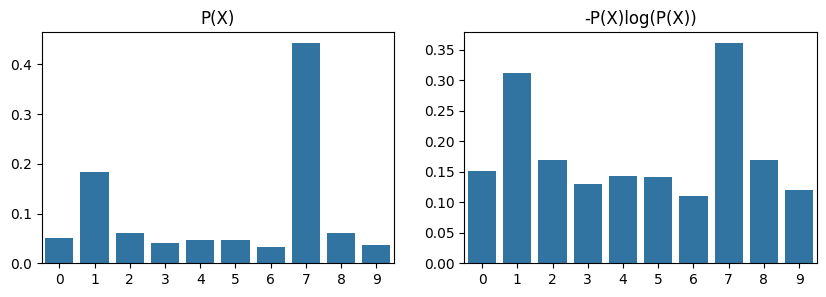

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,3))
sns.barplot(probs, ax=ax1).set(title="P(X)")
sns.barplot(-probs*torch.log(probs), ax=ax2).set(title="-P(X)log(P(X))")

# Compression

In [ ]:
import random
import zlib

In [ ]:
s = ''.join(random.choices(['R', 'S'], [0.01, 0.99], k=1000))
s

'SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSRSSSSSSSSSSSSSSRSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSRSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSRSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSRSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS

In [ ]:
len(zlib.compress(s.encode()))

29

In [ ]:
def compress_for(p, k=1000000):
    s = ''.join(random.choices(['R', 'S'], [p, 1-p], k=k))
    return len(zlib.compress(s.encode()))/k

In [ ]:
ps = np.linspace(0,1,10)

In [ ]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
compression_trials = []
for trial in range(5):
    print(trial)
    compressions = []
    for p in ps:
        c = compress_for(p)
        compressions.append(c)
    compression_trials.append(compressions)

0
1
2
3
4


In [ ]:
compression_ratio = np.average(np.array(compression_trials), 0)

[<matplotlib.lines.Line2D>]

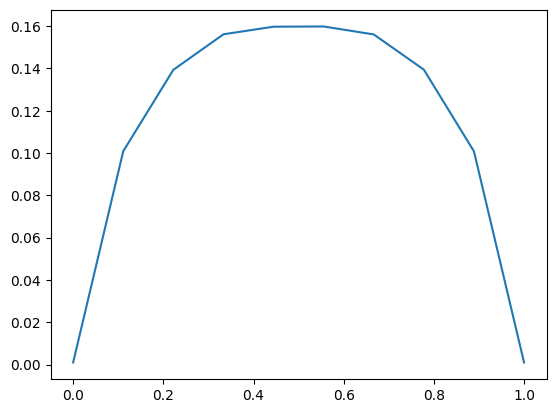

In [ ]:
plt.plot(ps,compression_ratio)

In [ ]:
# inner p
ip = ps[1:-1]

In [ ]:
entropy = - (ip*np.log(ip) + (1-ip)*np.log(1-ip))

[<matplotlib.lines.Line2D>]

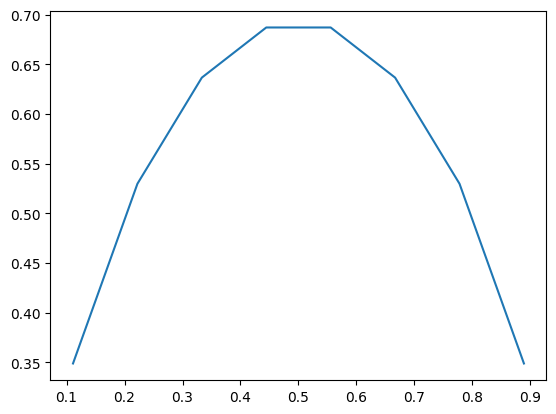

In [ ]:
plt.plot(ip,entropy)

Text(0, 0.5, 'Compression ratio')

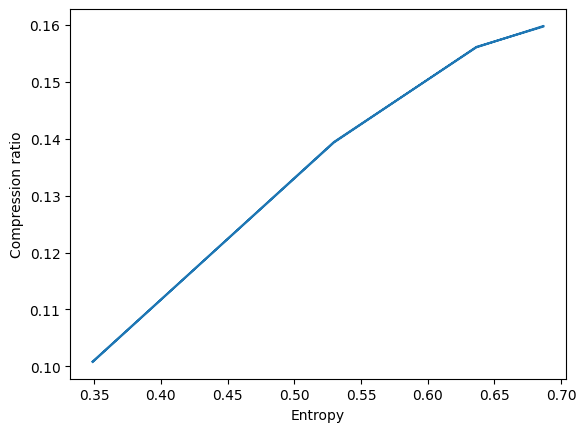

In [ ]:
plt.plot(entropy, compression_ratio[1:-1])
plt.xlabel("Entropy")
plt.ylabel("Compression ratio")